In [1]:
import pandas as pd
import autoplier.model as ap
import autoplier.plot as plot
import matplotlib.pyplot as plt
import mygene
import json
import csv
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, average_precision_score
import numpy as np

In [2]:
gtex = pd.read_csv("GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_tpm.gct", skiprows = 2,sep = "\t" ,header = 0)

In [3]:
gtex.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.03629,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
1,ENSG00000227232.5,WASH7P,8.76400,3.861,7.349,11.07000,3.306,5.389,11.99,16.95000,...,1.60600,2.26800,5.38600,2.31,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
2,ENSG00000278267.1,MIR6859-1,0.00000,0.000,1.004,0.00000,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
3,ENSG00000243485.5,MIR1302-2HG,0.07187,0.000,0.000,0.06761,0.000,0.000,0.00,0.00000,...,0.00000,0.00000,0.06073,0.00,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
4,ENSG00000237613.2,FAM138A,0.00000,0.000,0.000,0.00000,0.000,0.000,0.00,0.03904,...,0.02429,0.00000,0.00000,0.00,0.00000,0.0000,0.000,0.00000,0.00000,0.00000


In [4]:
gtex = gtex.set_index("Name")

In [5]:
gtex = gtex.drop("Description", axis = 1)

In [6]:
gtex

,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F-2926-SM-5GZYI,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
Name,,,,,,,,,,,,,,,,,,,,,
ENSG00000223972.5,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.00000,0.000,0.00000,...,0.00000,0.03629,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.01965,0.02522
ENSG00000227232.5,8.76400,3.861,7.349,11.07000,3.306,5.3890,11.990,16.95000,10.040,12.50000,...,1.60600,2.26800,5.38600,2.310,2.45600,4.0230,1.922,2.85700,0.86960,2.16700
ENSG00000278267.1,0.00000,0.000,1.004,0.00000,0.000,0.0000,0.000,0.00000,0.000,0.00000,...,0.00000,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
ENSG00000243485.5,0.07187,0.000,0.000,0.06761,0.000,0.0000,0.000,0.00000,0.000,0.06265,...,0.00000,0.00000,0.06073,0.000,0.08464,0.1435,0.000,0.05216,0.00000,0.00000
ENSG00000237613.2,0.00000,0.000,0.000,0.00000,0.000,0.0000,0.000,0.03904,0.000,0.00000,...,0.02429,0.00000,0.00000,0.000,0.00000,0.0000,0.000,0.00000,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000198695.2,3799.00000,14750.000,6728.000,817.30000,7051.000,1857.0000,1041.000,1362.00000,1726.000,3898.00000,...,26170.00000,7690.00000,14080.00000,17230.000,18710.00000,4290.0000,2446.000,16250.00000,19660.00000,9803.00000
ENSG00000210194.1,16.24000,44.310,23.740,0.00000,2.252,3.7310,2.319,0.68970,2.703,10.22000,...,105.20000,31.82000,48.78000,65.860,65.86000,15.3100,4.530,58.26000,59.07000,34.76000
ENSG00000198727.2,6938.00000,26310.000,8455.000,8799.00000,29170.000,18180.0000,9593.000,7064.00000,19630.000,9159.00000,...,36570.00000,29300.00000,33570.00000,34040.000,31900.00000,20620.0000,16820.000,19200.00000,36670.00000,27740.00000


In [7]:
metadata = pd.read_csv("GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt", sep = "\t", index_col = "SAMPID")

In [8]:
metadata

,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,SMNABTCH,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,BP-38516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,BP-42319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K-562-SM-E9EZC,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26289400.0,27814300.0,0.002441,26121600.0,49.8400,0.006370,0.995167,NaN,0.0,50.2621
K-562-SM-E9EZI,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,26653800.0,28341700.0,0.002336,26553400.0,49.9056,0.006806,0.994802,NaN,0.0,50.2046
K-562-SM-E9EZO,NaN,NaN,NaN,NaN,Bone Marrow,Cells - Leukemia cell line (CML),EFO_0002067,NaN,NaN,BP-65884,...,14317500.0,15168000.0,0.001731,14163500.0,49.7298,0.006662,0.994935,NaN,0.0,50.2412


In [9]:
pathway_genes = []
pathway_names = []

with open('c8.all.v7.5.1.entrez.gmt', newline='\n') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    for row in reader:
        pathway_names += [row[0]]
        pathway_genes += [row[2:]]

In [10]:
mlb = MultiLabelBinarizer()
pathways = pd.DataFrame(mlb.fit_transform(pathway_genes), index = pathway_names, columns = mlb.classes_)

In [11]:
mg = mygene.MyGeneInfo()
genes = pathways.columns.tolist()
info = mg.getgenes(genes, fields="ensembl")

querying 1-1000...done.
querying 1001-2000...done.
querying 2001-3000...done.
querying 3001-4000...done.
querying 4001-5000...done.
querying 5001-6000...done.
querying 6001-7000...done.
querying 7001-8000...done.
querying 8001-9000...done.
querying 9001-10000...done.
querying 10001-11000...done.
querying 11001-12000...done.
querying 12001-13000...done.
querying 13001-14000...done.
querying 14001-15000...done.
querying 15001-16000...done.
querying 16001-17000...done.
querying 17001-18000...done.
querying 18001-19000...done.
querying 19001-19170...done.


In [12]:
not_in_db = []
rename = {}
for x in info:
    if("ensembl" in x):
        y = x["ensembl"]
        if(type(y) == list):
            y = y[0]
        rename[x["query"]] = y["gene"]
    else:
        not_in_db += [x["query"]]

In [13]:
pathways = pathways.drop(columns = not_in_db)
pathways = pathways.rename(columns=rename)

In [14]:
pathways = pathways.groupby(level = 0, axis = 1).first()

In [15]:
pathways

,126231,55872,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,...,ENSG00000288596,ENSG00000288673,ENSG00000288701,ENSG00000288722,ENSG00000288825,ENSG00000288859,ENSG00000288905,ENSG00000288920,ENSG00000289083,ENSG00000289731
BUSSLINGER_ESOPHAGEAL_QUIESCENT_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_PROLIFERATING_BASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_EARLY_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_LATE_SUPRABASAL_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BUSSLINGER_ESOPHAGEAL_DENDRITIC_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GAUTAM_EYE_IRIS_CILIARY_BODY_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_CORNEA_CYTOTOXIC_T_CELLS,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_CRYAA_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAUTAM_EYE_IRIS_CILIARY_BODY_COL9A1_HIGH_CILIARY_BODY_CELLS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
gtex.index = [i.split(".")[0] for i in gtex.index.tolist()]

In [17]:
gtex = gtex[gtex.index.isin(pathways.columns)]
gtex = gtex[~gtex.index.duplicated(keep='first')]
gtex = gtex + 1
gtex = gtex.transform(lambda x: np.log(x))

In [18]:
pathways = pathways.T[pathways.columns.isin(gtex.index)].T

In [19]:
# Autoplier callbacks
callbacks = [
        #early stopping - to mitigate overfitting
        EarlyStopping(patience=100, monitor='val_loss'),
        #monitor umatrix sparsity
        ]

In [20]:
def sparsity(z):
    s = (np.sum((z == 0).astype(int)).sum()) / float(z.size)
    return s

In [21]:
def train_autoplier(X_train,X_test, pathways, seed, n_LVs, regval = 1.20E-7 ):
    ap.set_seed_(seed)
    model = ap.autoPLIER(n_LVs, regval = regval,learning_rate= 0.000156)
    model.fit(X_train, pathways, verbose=0, batch_size = None, callbacks = callbacks)
    Z_test = model.transform(X_test, pathways)
    Z_train = model.transform(X_train, pathways)
    print(ap.sparsity_epsilon(model.components_decomposition_, 0))
    
    return Z_train, Z_test, model

In [22]:
metadata = metadata[metadata.index.isin(gtex.columns)]

In [23]:
tissue_types = metadata["SMTS"].unique()

In [24]:
metadata["SMTS"].value_counts()

Brain              2642
Skin               1809
Esophagus          1445
Blood Vessel       1335
Adipose Tissue     1204
Blood               929
Heart               861
Muscle              803
Colon               779
Thyroid             653
Nerve               619
Lung                578
Breast              459
Testis              361
Stomach             359
Pancreas            328
Pituitary           283
Adrenal Gland       258
Prostate            245
Spleen              241
Liver               226
Small Intestine     187
Ovary               180
Salivary Gland      162
Vagina              156
Uterus              142
Kidney               89
Bladder              21
Cervix Uteri         19
Fallopian Tube        9
Name: SMTS, dtype: int64

In [36]:
metadata["SMTS"][metadata["SMTS"] == "Nerve"].append(metadata["SMTS"][metadata["SMTS"] == "Thyroid"])

SAMPID
GTEX-111CU-2226-SM-5N9G5      Nerve
GTEX-111FC-0526-SM-5GZZ8      Nerve
GTEX-111VG-2526-SM-5GZXP      Nerve
GTEX-111YS-2126-SM-5EGGM      Nerve
GTEX-113IC-0526-SM-5HL76      Nerve
                             ...   
GTEX-ZYVF-1126-SM-5E458     Thyroid
GTEX-ZYW4-1126-SM-5SI99     Thyroid
GTEX-ZYY3-1926-SM-5GZXS     Thyroid
GTEX-ZZ64-0126-SM-5GZXA     Thyroid
GTEX-ZZPU-1326-SM-5GZWS     Thyroid
Name: SMTS, Length: 1272, dtype: object

In [25]:
# fscore metric used to evaluate classifiers
def fscore(p, r):
    denom = p + r or 1

    return 2*(p * r) / denom

In [41]:
def compare_tissues(tissue1, tissue2, GTEX, metadata, pathways, n_LVs, seed):
    
    sampleids = metadata["SMTS"][metadata["SMTS"] == tissue1].append(metadata["SMTS"][metadata["SMTS"] == tissue2])
    
    
    X_train, X_test, y_train, y_test = train_test_split(GTEX.T, metadata["SMTS"], test_size=0.33, random_state=111)
    
    Z_train, Z_test, model = train_autoplier(X_train,X_test, pathways, seed, n_LVs, regval = 1.20E-7 )
    
    print(Z_train)
    
    Z_train = Z_train[Z_train.index.isin(sampleids.index)]
    
    Z_test = Z_test[Z_test.index.isin(sampleids.index)]
    
    y_train = y_train[y_train.index.isin(sampleids.index)] 
    
    y_test = y_test[y_test.index.isin(sampleids.index)] 
    
    train_target = y_train == tissue1
    test_target = y_test == tissue1
    
    clf = LogisticRegression(solver = "liblinear",penalty = "l2",random_state=111, max_iter = 1000)
    
    clf.fit(Z_train, train_target)
    
    target_pred = clf.predict(Z_test)
    target_probs = clf.predict_proba(Z_test)[:,1]
    
    
    test_precision = precision_score(test_target, target_pred)
    test_recall = recall_score(test_target, target_pred)
    ap = average_precision_score(test_target, target_probs)
    fscore_ap = fscore(test_precision, test_recall)
    
    
    pca_mod = PCA(n_components=2)
    X_pca = pca_mod.fit_transform(Z_train)
    
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.scatter(X_pca[:,0], X_pca[:,1], c = train_target.values.astype(int))
    plt.show()
    
    print("precision: "+ str(test_precision)+" ,recall: "+ str(test_recall)+" ,fscore: " + str(fscore_ap) +" ,average_precision: " + str(ap))
    
    coeffs = clf.coef_
    coeffs = coeffs.squeeze()
    
    largest = coeffs.argsort()[-1:]
    smallest = coeffs.argsort()[:1]
    
    largest_vals = [coeffs[x] for x in largest]
    smallest_vals = [coeffs[x] for x in smallest]
    
    print("LVs associated with classification of "+tissue1+" :" )
    print(largest)
    print(largest_vals)
    for lv in largest:
        plot.plot_top_pathways([lv], 5, (10,5), model)
        plt.title(f'LV {lv}')
        plt.show()
    
    print("LVs associated with classification of "+tissue2+" :" )
    print(smallest)
    print(smallest_vals)
    for lv in smallest:
        plot.plot_top_pathways([lv], 5, (10,5), model)
        plt.title(f'LV {lv}')

(11645, 700)
(5737, 700)
(11645, 700)
0.0
                                      0            1            2    \
GTEX-14E6D-1026-SM-5S2RS       337.792847  2079.282227  1102.307373   
GTEX-146FR-1826-SM-5QGPF       138.029266  1827.982544   981.207825   
GTEX-1HCU8-0726-SM-ADEIR       177.667801  1909.414795   999.946411   
GTEX-13X6I-0011-R10a-SM-5PNWI   96.908569  1703.479248   891.448242   
GTEX-RU72-1226-SM-2TF6N        132.260391  1927.551270  1001.965393   
...                                   ...          ...          ...   
GTEX-1CB4H-0126-SM-7IGN2       189.349136  1941.602661  1059.630981   
GTEX-14AS3-1026-SM-5TDD7       189.134674  1908.061768  1006.564270   
GTEX-14PJ6-1226-SM-6LLHJ       171.260757  1989.755615  1020.191956   
GTEX-1J8Q3-0126-SM-C1YSI       271.807373  1840.945679  1092.020386   
GTEX-1RB15-0826-SM-E9U4Z       148.394150  1868.491333   992.545227   

                                       3           4           5    \
GTEX-14E6D-1026-SM-5S2RS       1331

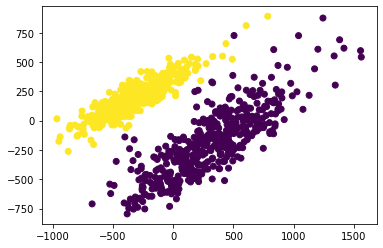

precision: 1.0 ,recall: 1.0 ,fscore: 1.0 ,average_precision: 1.0
LVs associated with classification of Nerve :
[59]
[0.029228080040587533]


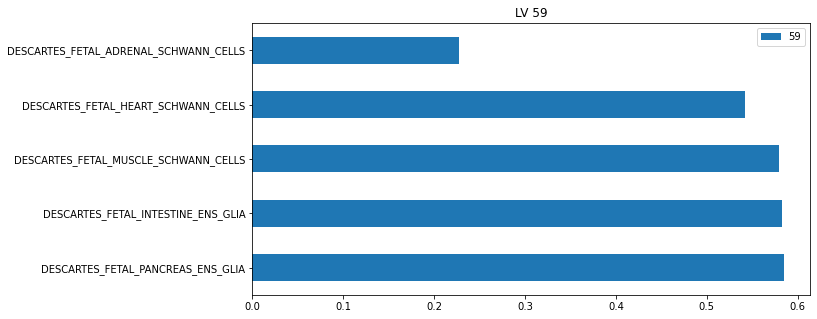

LVs associated with classification of Thyroid :
[113]
[-0.011061468802548796]


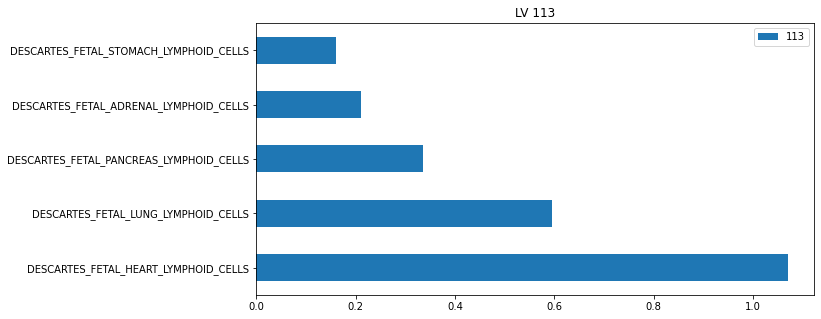

In [42]:
compare_tissues("Nerve", "Thyroid", gtex, metadata, pathways, 130 ,111)

(11645, 700)
(5737, 700)
(11645, 700)
0.0
                                      0            1            2    \
GTEX-14E6D-1026-SM-5S2RS       337.792847  2079.282227  1102.307373   
GTEX-146FR-1826-SM-5QGPF       138.029266  1827.982544   981.207825   
GTEX-1HCU8-0726-SM-ADEIR       177.667801  1909.414795   999.946411   
GTEX-13X6I-0011-R10a-SM-5PNWI   96.908569  1703.479248   891.448242   
GTEX-RU72-1226-SM-2TF6N        132.260391  1927.551270  1001.965393   
...                                   ...          ...          ...   
GTEX-1CB4H-0126-SM-7IGN2       189.349136  1941.602661  1059.630981   
GTEX-14AS3-1026-SM-5TDD7       189.134674  1908.061768  1006.564270   
GTEX-14PJ6-1226-SM-6LLHJ       171.260757  1989.755615  1020.191956   
GTEX-1J8Q3-0126-SM-C1YSI       271.807373  1840.945679  1092.020386   
GTEX-1RB15-0826-SM-E9U4Z       148.394150  1868.491333   992.545227   

                                       3           4           5    \
GTEX-14E6D-1026-SM-5S2RS       1331

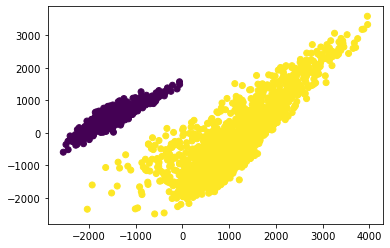

precision: 1.0 ,recall: 0.9988479262672811 ,fscore: 0.9994236311239193 ,average_precision: 1.0
LVs associated with classification of Brain :
[73]
[0.005741639241014796]


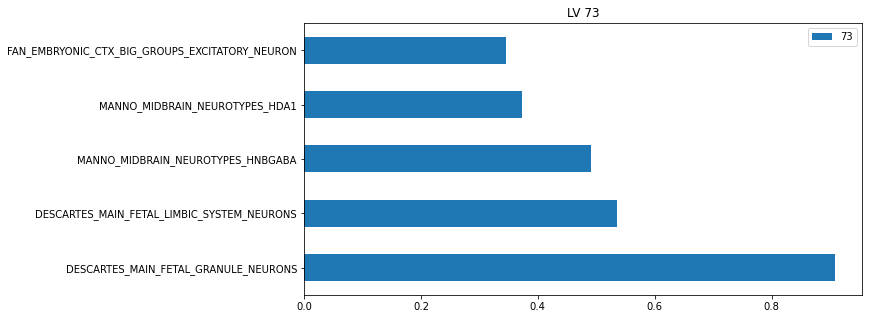

LVs associated with classification of Skin :
[52]
[-0.0036423206239341453]


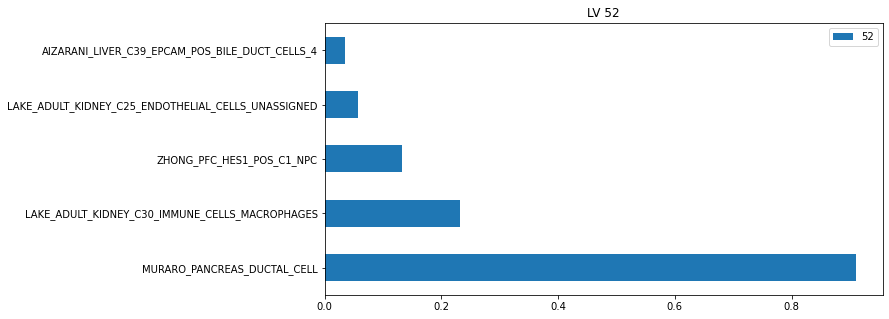

In [43]:
compare_tissues("Brain", "Skin", gtex, metadata, pathways, 130 ,111)

(11645, 700)
(5737, 700)
(11645, 700)
0.0
                                      0            1            2    \
GTEX-14E6D-1026-SM-5S2RS       337.792847  2079.282227  1102.307373   
GTEX-146FR-1826-SM-5QGPF       138.029266  1827.982544   981.207825   
GTEX-1HCU8-0726-SM-ADEIR       177.667801  1909.414795   999.946411   
GTEX-13X6I-0011-R10a-SM-5PNWI   96.908569  1703.479248   891.448242   
GTEX-RU72-1226-SM-2TF6N        132.260391  1927.551270  1001.965393   
...                                   ...          ...          ...   
GTEX-1CB4H-0126-SM-7IGN2       189.349136  1941.602661  1059.630981   
GTEX-14AS3-1026-SM-5TDD7       189.134674  1908.061768  1006.564270   
GTEX-14PJ6-1226-SM-6LLHJ       171.260757  1989.755615  1020.191956   
GTEX-1J8Q3-0126-SM-C1YSI       271.807373  1840.945679  1092.020386   
GTEX-1RB15-0826-SM-E9U4Z       148.394150  1868.491333   992.545227   

                                       3           4           5    \
GTEX-14E6D-1026-SM-5S2RS       1331

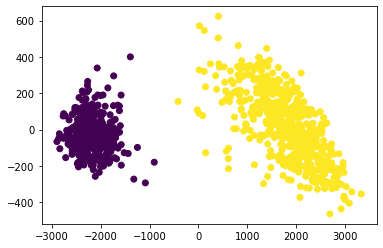

precision: 1.0 ,recall: 1.0 ,fscore: 1.0 ,average_precision: 0.9999999999999999
LVs associated with classification of Muscle :
[5]
[0.008453446747616517]


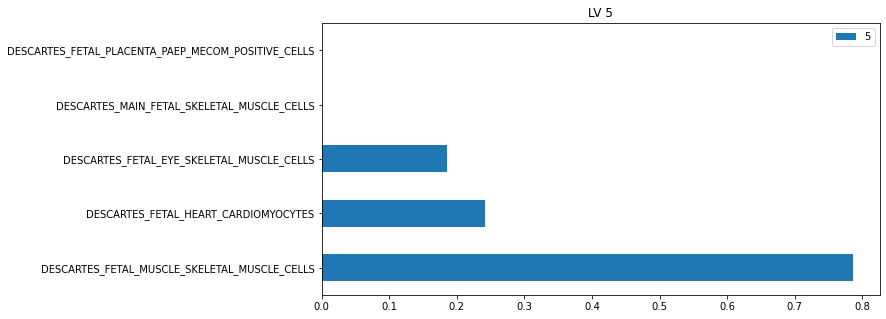

LVs associated with classification of Nerve :
[59]
[-0.004568558292962184]


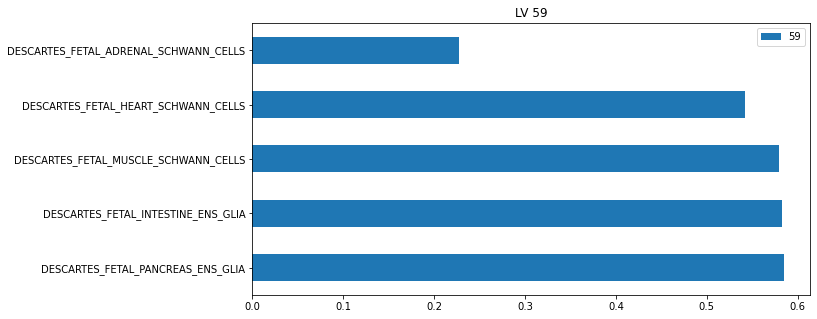

In [44]:
compare_tissues("Muscle", "Nerve", gtex, metadata, pathways, 130 ,111)

(11645, 700)
(5737, 700)
(11645, 700)
0.0
                                      0            1            2    \
GTEX-14E6D-1026-SM-5S2RS       337.792847  2079.282227  1102.307373   
GTEX-146FR-1826-SM-5QGPF       138.029266  1827.982544   981.207825   
GTEX-1HCU8-0726-SM-ADEIR       177.667801  1909.414795   999.946411   
GTEX-13X6I-0011-R10a-SM-5PNWI   96.908569  1703.479248   891.448242   
GTEX-RU72-1226-SM-2TF6N        132.260391  1927.551270  1001.965393   
...                                   ...          ...          ...   
GTEX-1CB4H-0126-SM-7IGN2       189.349136  1941.602661  1059.630981   
GTEX-14AS3-1026-SM-5TDD7       189.134674  1908.061768  1006.564270   
GTEX-14PJ6-1226-SM-6LLHJ       171.260757  1989.755615  1020.191956   
GTEX-1J8Q3-0126-SM-C1YSI       271.807373  1840.945679  1092.020386   
GTEX-1RB15-0826-SM-E9U4Z       148.394150  1868.491333   992.545227   

                                       3           4           5    \
GTEX-14E6D-1026-SM-5S2RS       1331

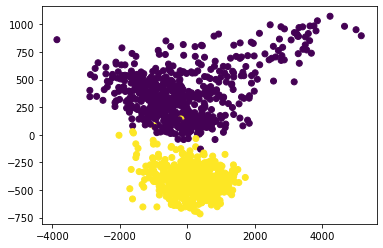

precision: 1.0 ,recall: 1.0 ,fscore: 1.0 ,average_precision: 0.9999999999999999
LVs associated with classification of Muscle :
[13]
[0.027365637014817187]


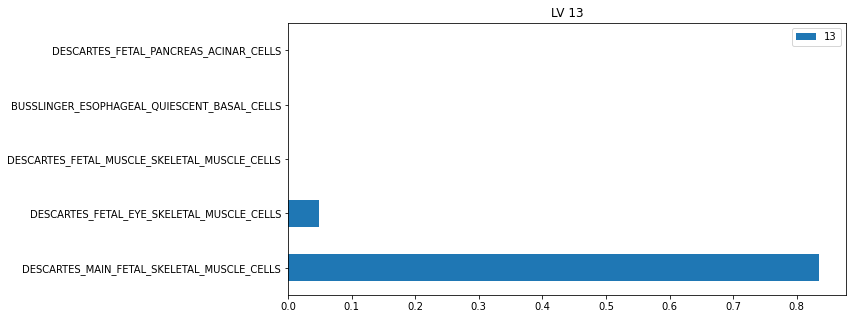

LVs associated with classification of Heart :
[67]
[-0.012248645586833102]


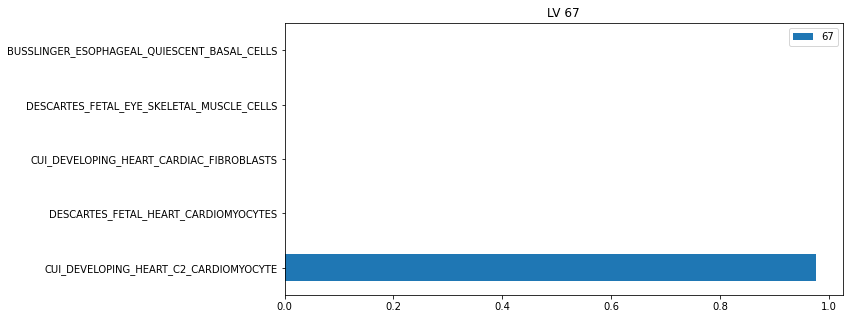

In [45]:
compare_tissues("Muscle", "Heart", gtex, metadata, pathways, 130 ,111)